# 7. Exploratory Data Analysis and Test/Train Split

**RECAP:** From **6. Add Observations and Remove Unnecessary Features** a tidy table with all numeric features was created and ready for modeling.  
  
This table will be used in this section for some exploratory, feature exclusion data analysis and visualisation prior to optimising and fitting inferential and predictive models.

## Prep

### Import modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP

C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\umap\distances.py:1086: 

### Load data

In [5]:
df = pd.read_csv('data_for_model_3.csv')

#df.index = df.patient_id
#df.drop (columns = ['patient_id', 'Unnamed:0'])

print(df.shape)
display (df.head(5).T)

(824306, 155)


0  \
patient_id               b50cf381-c159-4a26-963a-99ce74e1fece   
DTaP                                                  29200.0   
HPV  quadrivalent                                     29200.0   
Hep A  ped/adol  2 dose                               29200.0   
Hib (PRP-OMP)                                         29200.0   
...                                                       ...   
Systolic Blood Pressure                                 131.0   
Total Cholesterol                                       165.0   
Total score [MMSE]                                       27.0   
Triglycerides                                           131.0   
Urea Nitrogen                                            18.0   

                                                            1  \
patient_id               d572ae25-5c8d-4710-ad3e-8c5ee1fc2c14   
DTaP                                                  29200.0   
HPV  quadrivalent                                     29200.0   
Hep A  ped/adol  2 dose                               29200.0   
Hib (PRP-OMP)                                         29200.0   
...                                                       ...   
Systolic Blood Pressure                                 167.0   
Total Cholesterol                                       166.0   
Total score [MMSE]                                       27.0   
Triglycerides                                           143.0   
Urea Nitrogen                                            14.0   

                                                            2  \
patient_id               32ba4c93-ace6-4c6a-ae0e-2532f5644bd3   
DTaP                                                  29200.0   
HPV  quadrivalent                                     29200.0   
Hep A  ped/adol  2 dose                               29200.0   
Hib (PRP-OMP)                                         29200.0   
...                                                       ...   
Systolic Blood Pressure                                 118.0   
Total Cholesterol                                       174.0   
Total score [MMSE]                                       27.0   
Triglycerides                                           105.0   
Urea Nitrogen                                            14.0   

                                                            3  \
patient_id               7498c6fc-5ccb-4c93-9837-b8b817f0f036   
DTaP                                                  29200.0   
HPV  quadrivalent                                     29200.0   
Hep A  ped/adol  2 dose                               29200.0   
Hib (PRP-OMP)                                         29200.0   
...                                                       ...   
Systolic Blood Pressure                                 119.0   
Total Cholesterol                                       190.0   
Total score [MMSE]                                       27.0   
Triglycerides                                             1.6   
Urea Nitrogen                                            14.0   

                                                            4  
patient_id               9b2633ae-db59-466a-88f9-8ad62373a21a  
DTaP                                                  29200.0  
HPV  quadrivalent                                     29200.0  
Hep A  ped/adol  2 dose                               29200.0  
Hib (PRP-OMP)                                         29200.0  
...                                                       ...  
Systolic Blood Pressure                                 103.0  
Total Cholesterol                                       162.0  
Total score [MMSE]                                       27.0  
Triglycerides                                           105.0  
Urea Nitrogen                                             9.0  

[155 rows x 5 columns]

The response variable is shown below:

In [6]:
# Assuming you have a DataFrame called 'df'
column_name = df.filter(like='prediabetes').columns[0]

print("Column name:", column_name)

Column name: prediabetes_bin_y


## Correlation among independent variables

An important first step is to assess the degree of colinearity amongst the features.

In [7]:
# obtain correlation matrix
corr_matrix = df.corr(numeric_only = True)

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

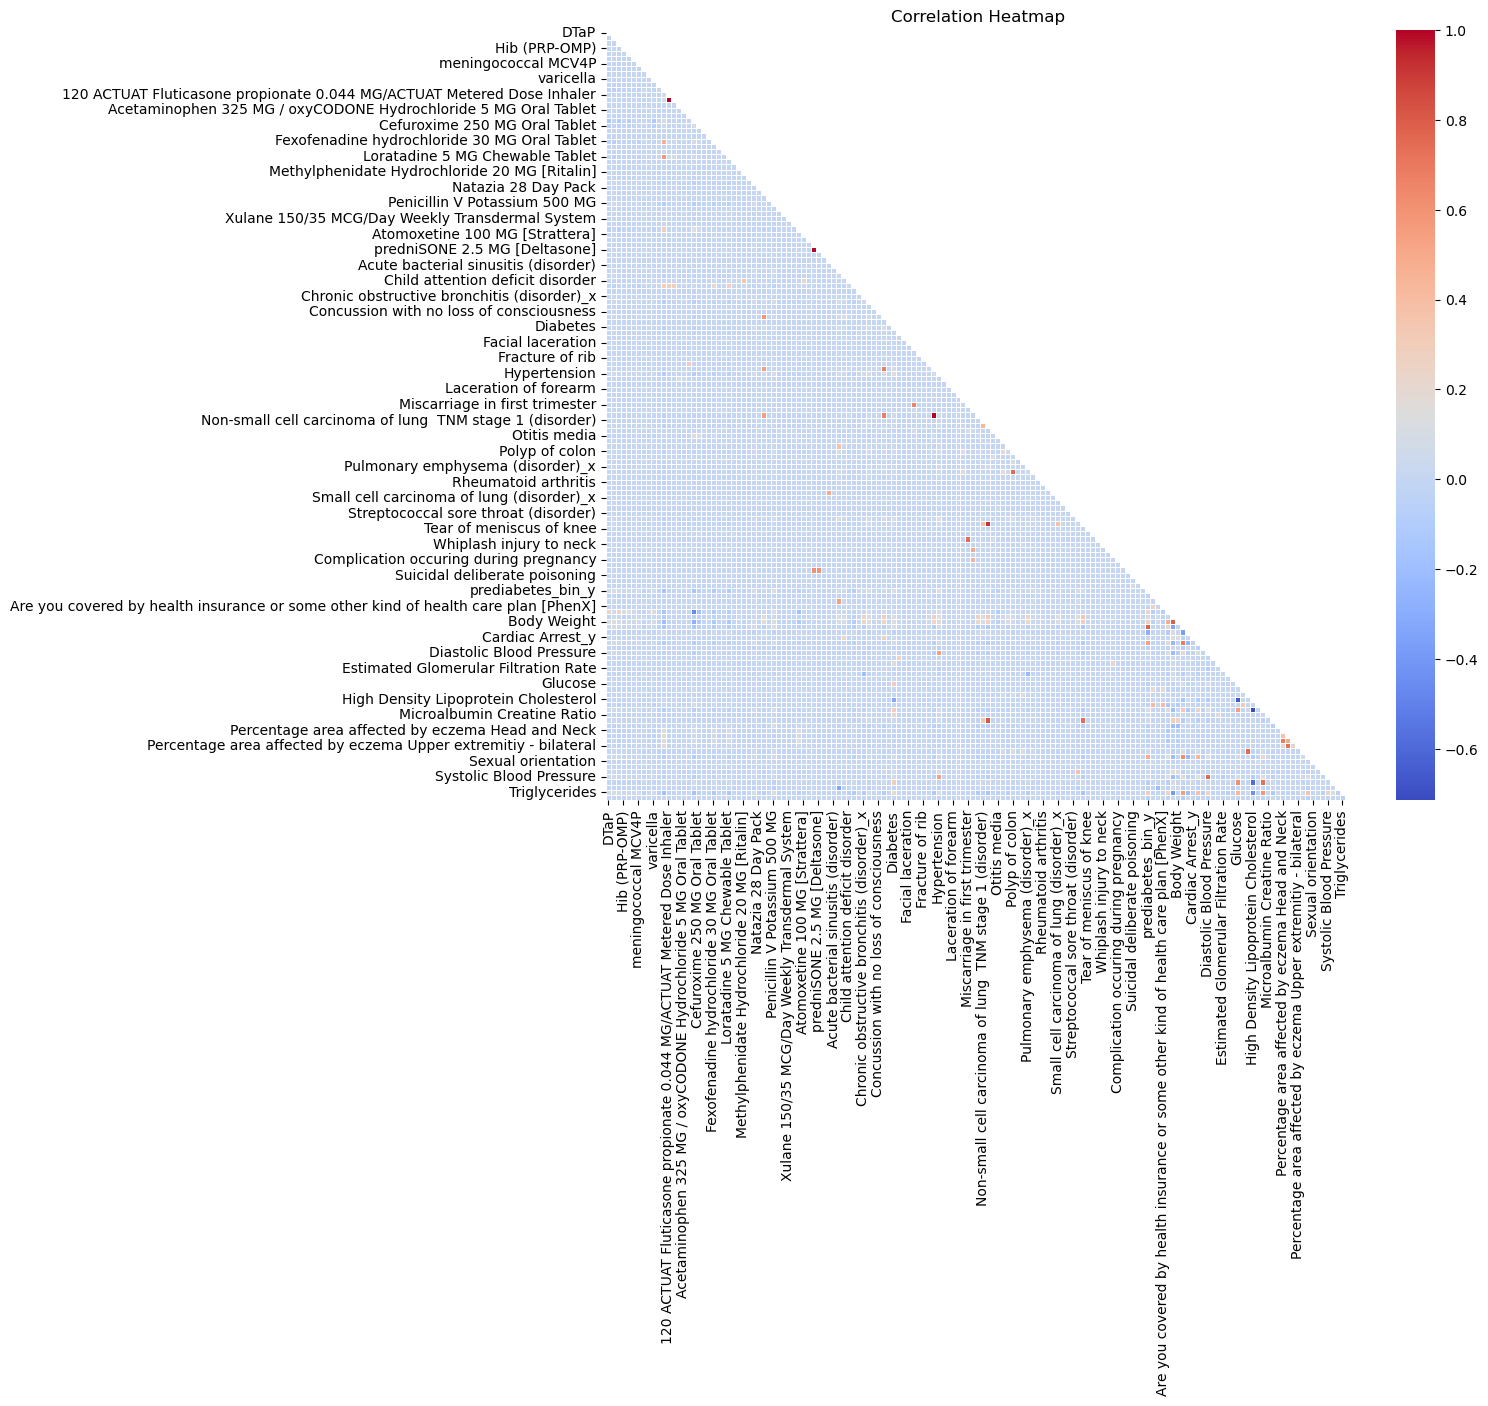

In [23]:
# Create a correlation heatmap using seaborn
plt.figure ( figsize = (12, 10) )  
sns.heatmap (corr_matrix, 
             cmap = 'coolwarm', 
             linewidths = 0.5,
             mask = mask
            )

# Display the heatmap
plt.title('Correlation Heatmap')
plt.show()

We can see that most variables appear virtually completely uncorrelated. Features with correlation higher than 0.7 and prediabetes status will be extracted and displayed.

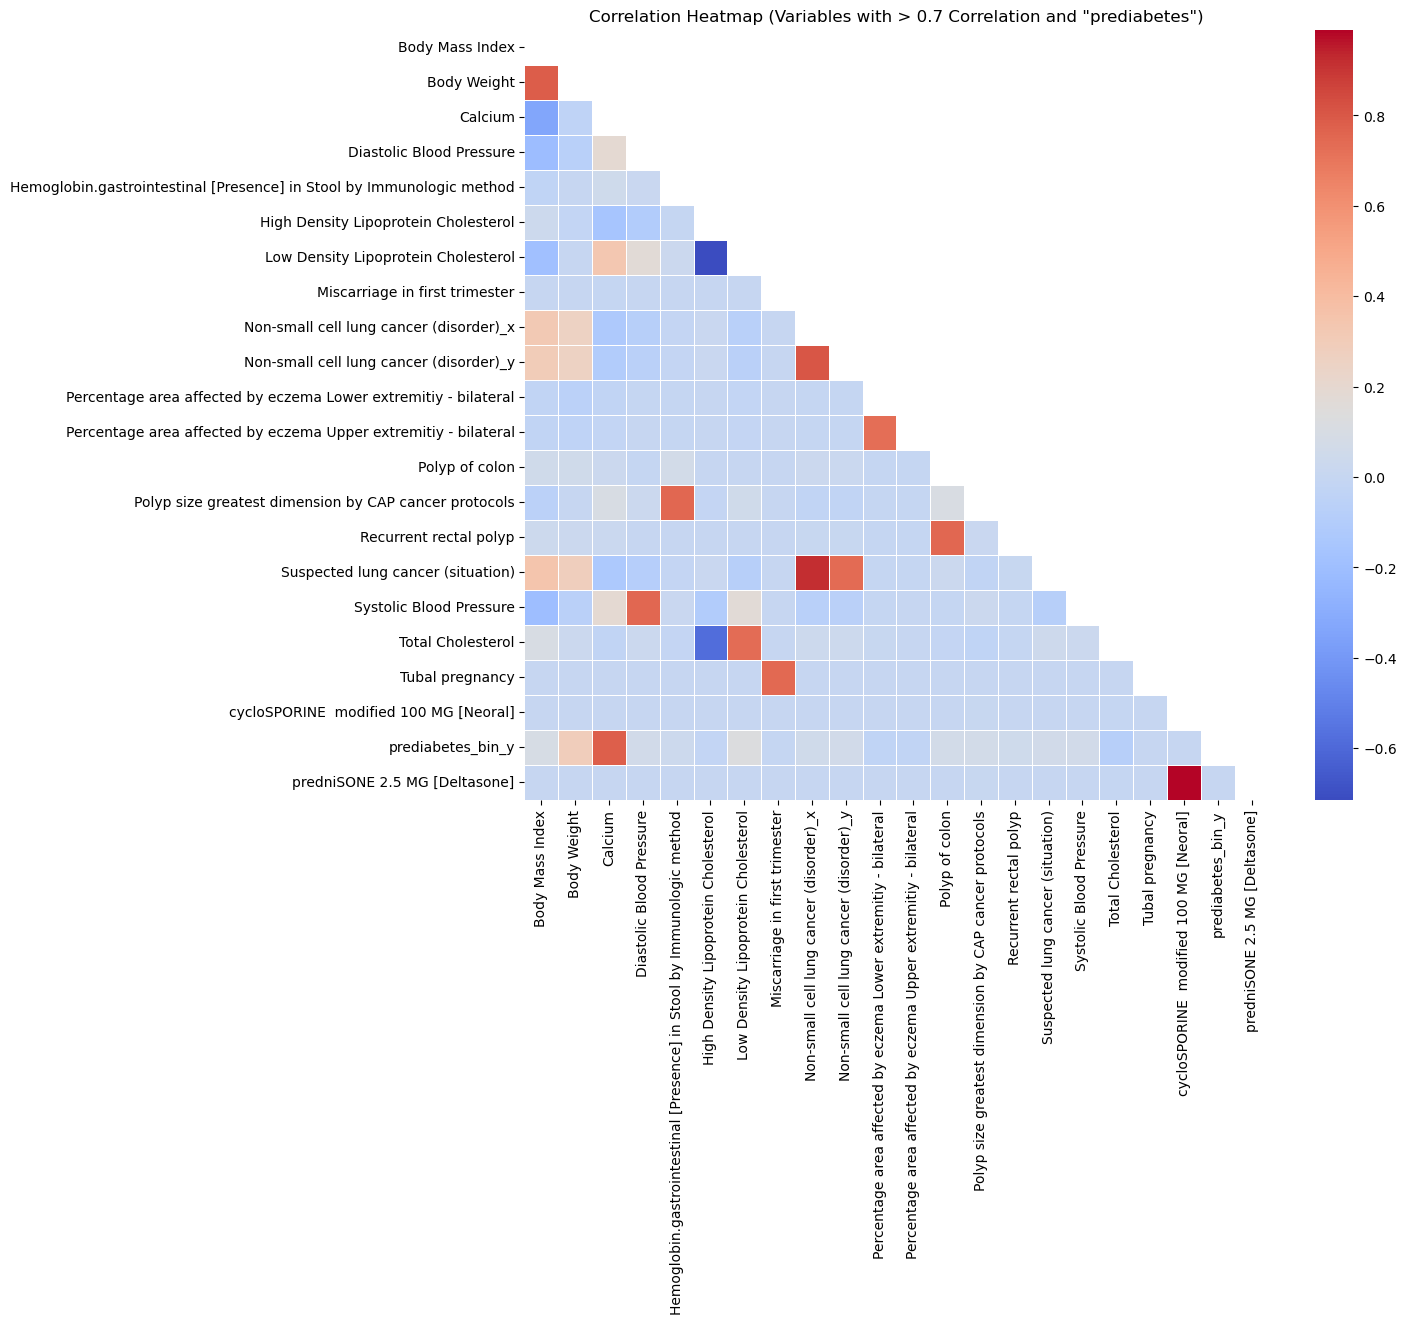

In [11]:
# Select the variables that have a correlation greater than 0.7
corr_threshold = 0.7
corr_matrix = df.corr(numeric_only = True).abs()
high_corr_vars = corr_matrix[(corr_matrix >= corr_threshold) & 
                             (corr_matrix < 1)
                            ].dropna(axis=0, how='all').dropna(axis=1, how='all').columns

# Include the 'prediabetes' variable in the high correlation variables
high_corr_vars = high_corr_vars.union(['prediabetes_bin_y'])

# Subset the DataFrame with the high correlation variables
df_subset = df[high_corr_vars]

# Calculate the correlation matrix for the subset
corr_matrix_subset = df_subset.corr(numeric_only = True)

# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(corr_matrix_subset, dtype=bool))

# Create a correlation heatmap using seaborn with the mask
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix_subset, cmap='coolwarm', linewidths=0.5, mask=mask)

# Display the heatmap
plt.title('Correlation Heatmap (Variables with > 0.7 Correlation and "prediabetes")')
plt.show()

We can observe that the variables ending in `_x` are associated with data derived from the `conditions` table and indicate how long the condition lasted, whereas variables ending in `_y` are derived from the `observations` table and indicate whether or not the patient was diagnosed with the corresponding condition (1 and 0, respectively).  
  
In order to reduce the dimensionality of our data, the diagnoses from the `observations` table (i.e. features ending in `_y`) will be dropped from the table.

## Reduce the number of dimensions by removing variables that provide little information explaining the dependent variables or are correlated with each other

The diagnosis vs conditions variables will be assessed for equality and some statistics extracted.

In [8]:
# Are the columns equivalent for Pneumonia
print(df[['Pneumonia_x', 'Pneumonia_y']].describe(),
      '\n----------------------------'
     )
print(df[['Myocardial Infarction_x', 'Myocardial Infarction_y']].describe(),
      '\n----------------------------'
     )
print(df[['Chronic obstructive bronchitis (disorder)_x', 'Chronic obstructive bronchitis (disorder)_y']].describe(),
      '\n----------------------------'
     )
print(df[['Pulmonary emphysema (disorder)_x', 'Pulmonary emphysema (disorder)_y']].describe(),
      '\n----------------------------'
     )
print(df[['Small cell carcinoma of lung (disorder)_x', 'Small cell carcinoma of lung (disorder)_y']].describe(),
      '\n----------------------------'
     )

         Pneumonia_x    Pneumonia_y
count  824306.000000  824306.000000
mean       33.979164       0.006435
std       514.192244       0.079957
min         0.000000       0.000000
25%         0.000000       0.000000
50%         0.000000       0.000000
75%         0.000000       0.000000
max     21192.000000       1.000000 
----------------------------
       Myocardial Infarction_x  Myocardial Infarction_y
count            824306.000000            824306.000000
mean                248.597827                 0.024257
std                1804.792762                 0.153845
min                   0.000000                 0.000000
25%                   0.000000                 0.000000
50%                   0.000000                 0.000000
75%                   0.000000                 0.000000
max               38969.000000                 1.000000 
----------------------------
       Chronic obstructive bronchitis (disorder)_x  \
count                                824306.000000   
mean

In [9]:
# Drop columns:
columns_to_drop = ['Pneumonia_y', 
                   'Myocardial Infarction_y', 
                   'Chronic obstructive bronchitis (disorder)_y',
                   'Pulmonary emphysema (disorder)_y',
                   'Small cell carcinoma of lung (disorder)_y'
                  ]
df.drop (columns = columns_to_drop, inplace = True)
print (df.shape)

(824306, 150)


It is clear that very few of the independent variables appear to be correlated/anticorrelated to a relatively high degree. Many of these can be seen as positive controls for the credibility of the synthetic data. Below are some examples:
- Body Weight & Body Mass Index
- Low Density Lipoprotein Cholesterol & High Density Lipoprotein Cholesterol
- Total Cholesterol & HDL Cholesterol
- cycloSPORINE & predniSONE (often taken together when single-drug treatment does not lead to adequate responses)
- Myocardial infarction & History of myocardial infarction
- Suspected lung cancer & Non-small cell lung cancer (disorder)

  
A very interesting association is calcium levels and prediabetes status, which will be commented on later. It seems that the correlation is even stronger than with body weight.

Correlation between the features detailed above:

In [12]:
# Define a list of variable pairs
variable_pairs = [('Body Weight', 'Body Mass Index'), 
                  ('Low Density Lipoprotein Cholesterol', 'High Density Lipoprotein Cholesterol'),
                  ('Total Cholesterol', 'High Density Lipoprotein Cholesterol'),
                  #('Myocardial Infarction_x', 'History of myocardial infarction (situation)'),
                  ('cycloSPORINE  modified 100 MG [Neoral]', 'predniSONE 2.5 MG [Deltasone]'),
                  ('Suspected lung cancer (situation)', 'Non-small cell lung cancer (disorder)_x'),
                  ('Recurrent rectal polyp', 'Polyp of colon')
                 ]

# Iterate over the variable pairs and display the correlation coefficients
for pair in variable_pairs:
    var1, var2 = pair
    correlation = corr_matrix_subset.loc[var1, var2]
    print(f"Correlation between {var1} and {var2}: {correlation}")
    print('---------------------------------------------\n')

Correlation between Body Weight and Body Mass Index: 0.7893604246569007
---------------------------------------------

Correlation between Low Density Lipoprotein Cholesterol and High Density Lipoprotein Cholesterol: -0.7141001705473566
---------------------------------------------

Correlation between Total Cholesterol and High Density Lipoprotein Cholesterol: -0.5840349063636571
---------------------------------------------

Correlation between cycloSPORINE  modified 100 MG [Neoral] and predniSONE 2.5 MG [Deltasone]: 0.9901113005415881
---------------------------------------------

Correlation between Suspected lung cancer (situation) and Non-small cell lung cancer (disorder)_x: 0.9185022951476778
---------------------------------------------

Correlation between Recurrent rectal polyp and Polyp of colon: 0.7532176037813761
---------------------------------------------



`History of mycardial infarction` will be removed completely given its perfect statistical and *logical* correlation with `Myocardial Infarction_x`. In addition, cycloSPORIN is in almost perfect correlation with predniSONE and therefore `predniSONE 2.5 MG [Deltasone]` will be dropped out as well.

In [13]:
print(df[['Low Density Lipoprotein Cholesterol', 'High Density Lipoprotein Cholesterol']].describe(),
      '\n----------------------------'
     )
print(df[['Suspected lung cancer (situation)', 'Non-small cell lung cancer (disorder)_x']].describe(),
      '\n----------------------------'
     )
print(df[['Recurrent rectal polyp', 'Polyp of colon']].describe(),
      '\n----------------------------'
     )

       Low Density Lipoprotein Cholesterol  \
count                        824306.000000   
mean                             83.178732   
std                              16.718863   
min                              50.000000   
25%                              75.000000   
50%                              75.000000   
75%                              90.000000   
max                             197.000000   

       High Density Lipoprotein Cholesterol  
count                         824306.000000  
mean                              68.083794  
std                                8.028004  
min                                0.000000  
25%                               67.000000  
50%                               69.000000  
75%                               70.000000  
max                               80.000000   
----------------------------
       Suspected lung cancer (situation)  \
count                      824306.000000   
mean                          329.154240   
std      

## Train-test split

Obtain response variable and independent variables. Perform a test/train split of the data with 30% saved for final test and 70% of the data used for training, optimisation and validation of various models.

In [32]:
# Extract independent and dependent variables:
X = df.drop ('prediabetes_bin_y', axis = 1)
y = df['prediabetes_bin_y']

In [33]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.3, stratify = y)

In [35]:
# Save tables:
X_train.to_csv ('X_train_4.csv')
X_test.to_csv ('X_test_4.csv')
y_train.to_csv ('y_train_4.csv')
y_test.to_csv ('y_test_4.csv')

## Proceed with reducing dimensions

For all pairs, the spread of the data (minimum and maximum) are comparable. Therefore, 2 tables will be generated:
- 1 for modelling using conventional machine learning methods
    - Features will be dropped out in order to ensure the features are independent and reduce dimensionality
    - Correlation will be controlled to a certain extent by regularization
    - Models that will be considered are logistic regression, random forests (or decision trees), SVMs and/or K-nearest means
    - Variables that will be dropped are the following:
        - Body weight (information captured more efficiently by Body Mass Index, which also factors in Height)
        - High Density Lipoprotein Cholesterol (information is capture by Low density lipoprotein cholesterol and Total cholesterol)
        - Recurrent rectal polyp (some of the information seems to be captured by Polyp of colon even though these polyps occur at different anatomical locations)
        - Suspected lung cancer (situation) - Non-small cell lung cancer (disorder) will be kept to preserve a bit more detail in terms of possible explanatory variables in the context of prediabetes prediction
- 1 for neural networks
    - neural networks have the capacity to overcome correlated variables for prediction
        - Body weight will still be remove since it appears to be redundant

In [14]:
# Define columns to drop for the standard statistical models
columns_to_drop_stat = ['History of myocardial infarction (situation)',
                        'High Density Lipoprotein Cholesterol',
                        'Suspected lung cancer (situation)',
                        'predniSONE 2.5 MG [Deltasone]',
                        'Recurrent rectal polyp',
                        'Body Weight'
                       ]
# Define columns to drop for Neural Networks models
columns_to_drop_NN = ['History of myocardial infarction (situation)',
                      'Body Weight'
                     ]
# Drop appropriate columns
df_stat = df.drop(columns = columns_to_drop_stat)
df_NN = df.drop (columns = columns_to_drop_NN)
print ('Original table dimensions:', df.shape)
print ('Dimensions of table to be used for conventional statistical models:', df_stat.shape)
print ('Dimensions of table to be used for NN models:', df_NN.shape)

Original table dimensions: (824306, 150)
Dimensions of table to be used for conventional statistical models: (824306, 144)
Dimensions of table to be used for NN models: (824306, 149)


Save clean and tidy data.

In [37]:
# Save tables:
df.to_csv ('data_for_model_4.csv')
df_stat.to_csv('data_for_stat_model.csv')
df_NN.to_csv ('data_for_NN_model.csv')

In [38]:
X_train_stat = X_train.drop (columns = columns_to_drop_stat)
X_test_stat = X_test.drop (columns = columns_to_drop_stat)
X_train_NN = X_train.drop (columns = columns_to_drop_NN)
X_test_NN = X_test.drop (columns = columns_to_drop_NN)

Save train and test subsets for statistical models where correlated independent variables are undesirable and for neural networks that are capable of dealing with this issue as separate subsets

In [42]:
# Save tables
X_train_stat.to_csv ('X_train_stat_4.csv') 
X_test_stat.to_csv ('X_test_stat_4.csv')
X_train_NN.to_csv ('X_train_NN_4.csv')
X_test_NN.to_csv ('X_test_NN_4.csv')

In [ ]:
# clean up memory:
del df, df_NN, df_stat, columns_to_drop, columns_to_drop_stat
del columns_to_drop_NN, variable_pairs, pair, var1, var2, corr_matrix, mask
del column_name, high_corr_vars, df_subset, corr_matrix_subset

In [51]:
print (X_train_stat.shape)
print (X_train_NN.shape)

(577014, 143)
(577014, 147)


---

## Dimensionality reduction and visualisation

In [3]:
X_train_stat = pd.read_csv ('X_train_stat_4.csv', index_col = 0)
y_train_stat = pd.read_csv ('y_train_4.csv', index_col = 0)

In [4]:
y_train_stat = y_train_stat.prediabetes_bin_y

In [5]:
y_train_stat

patient_id
6773bb31-345b-4949-a120-f05a8a68c83d    0
8f88d986-a1ca-42d1-9c18-83a7fd54673f    0
29232dc9-9f5a-46f2-9d6c-d59e87d668f4    1
6d889d3b-0bc0-46f0-84f2-b03b4552c169    0
6b80974c-2aae-47f6-9696-b3a8105a634f    1
                                       ..
65e6bffc-4cf6-41cf-87a2-16f006ccc3fb    0
23d35f01-a9cf-4f9b-9eff-b9fcbf640563    0
2229ab7b-de2d-4d8b-aef2-e34352e8cf20    1
2b6c0538-7fc7-4962-9e96-dd4306445ae1    0
078ba2ed-f263-43d8-8c2d-0a4dd3f305d8    1
Name: prediabetes_bin_y, Length: 577014, dtype: int64

### Scale

The data will fist left unscaled, MinMax- or Standard-scaled before performing dimensionality reduction and plotting to look for clusters. Note that the the table intended for NN will be used as it contains more features and one would expect similar results from the table intended for building conventional statistical models (containing less features).

#### MinMax Scaled

In [6]:
# Perform min-max scaling
minmax_scaler = MinMaxScaler()
minmax_scaled_data = minmax_scaler.fit_transform (X_train_stat)

#### Standard Scaled

In [7]:
# Perform standard scaling
standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(X_train_stat)

#### Unscaled data

In [8]:
unscaled_data = X_train_stat

### Dimensionality reduction

#### PCA

In [9]:
# Perform PCA on different scaled data
pca = PCA(n_components=2) # Select only 2 components for plotting

pca_minmax = pca.fit_transform(minmax_scaled_data)
pca_standard = pca.fit_transform(standard_scaled_data)
pca_unscaled = pca.fit_transform(unscaled_data)

#### tSNE

In [10]:
# Perform t-SNE on different scaled data
tsne = TSNE(n_components=2)

tsne_minmax = tsne.fit_transform(minmax_scaled_data)
tsne_standard = tsne.fit_transform(standard_scaled_data)
tsne_unscaled = tsne.fit_transform(unscaled_data)

#### UMAP

In [11]:
# Scale data:
# Perform min-max scaling
minmax_scaler = MinMaxScaler()
minmax_scaled_data = minmax_scaler.fit_transform (X_train_stat)
# Perform standard scaling
## !NB Standard scaling of binary variables does not make sense but will be tried anyway
standard_scaler = StandardScaler()
standard_scaled_data = standard_scaler.fit_transform(X_train_stat)
# Unscaled data:
unscaled_data = X_train_stat

In [12]:
# Perform UMAP on different scaled data
umap = UMAP(n_components=2)

umap_minmax = umap.fit_transform(minmax_scaled_data)

In [13]:
try :
    umap_standard = umap.fit_transform(standard_scaled_data)
except ValueError:
    skip_ = False

C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [14]:
umap_unscaled = umap.fit_transform(unscaled_data)

C:\Users\Vassil\anaconda3\envs\ensemble\Lib\site-packages\sklearn\manifold\_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


### Plots

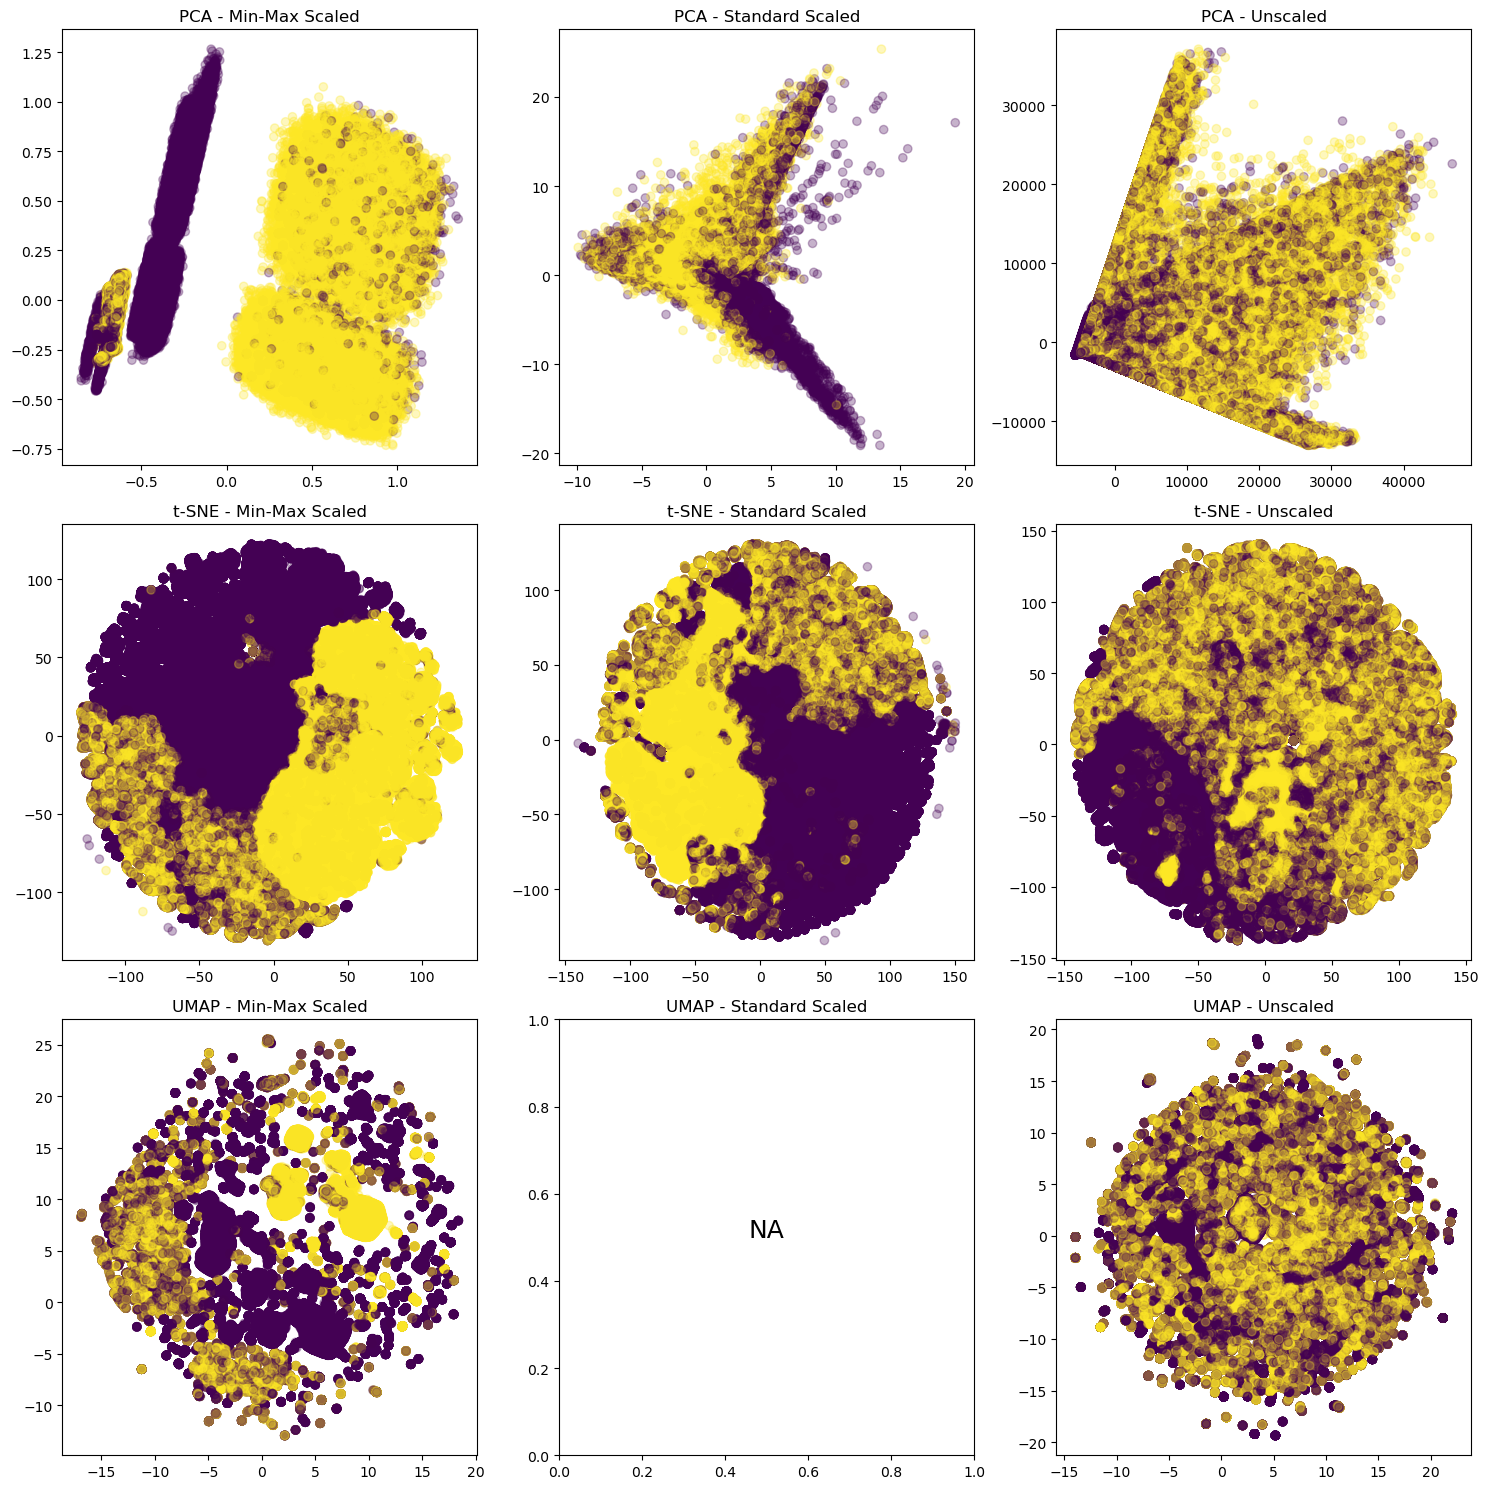

In [19]:
# Set point colours based on outcome
labels = y_train_stat

# Plotting the results
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Plot PCA
axes[0, 0].scatter(pca_minmax[:, 0], 
                   pca_minmax[:, 1], 
                   label='Min-Max Scaled',
                   c = labels,
                   cmap = 'viridis',
                   alpha = 0.3
                  )
axes[0, 1].scatter(pca_standard[:, 0], 
                   pca_standard[:, 1], 
                   label='Standard Scaled',
                   c = labels,
                   cmap = 'viridis',
                   alpha = 0.3
                  )
axes[0, 2].scatter(pca_unscaled[:, 0], 
                   pca_unscaled[:, 1], 
                   label='Unscaled',
                   c = labels,
                   cmap = 'viridis',
                   alpha = 0.3
                  )
axes[0, 0].set_title('PCA - Min-Max Scaled')
axes[0, 1].set_title('PCA - Standard Scaled')
axes[0, 2].set_title('PCA - Unscaled')

# Plot t-SNE
axes[1, 0].scatter(tsne_minmax[:, 0], 
                   tsne_minmax[:, 1], 
                   label='Min-Max Scaled',
                   c = labels,
                   cmap = 'viridis',
                   alpha = 0.3
                  )
axes[1, 1].scatter(tsne_standard[:, 0], 
                   tsne_standard[:, 1], 
                   label='Standard Scaled',
                   c = labels,
                   cmap = 'viridis',
                   alpha = 0.3
                  )
axes[1, 2].scatter(tsne_unscaled[:, 0], 
                   tsne_unscaled[:, 1], 
                   label='Unscaled',
                   c = labels,
                   cmap = 'viridis',
                   alpha = 0.3
                  )
axes[1, 0].set_title('t-SNE - Min-Max Scaled')
axes[1, 1].set_title('t-SNE - Standard Scaled')
axes[1, 2].set_title('t-SNE - Unscaled')

# Plot UMAP
axes[2, 0].scatter(umap_minmax[:, 0], 
                   umap_minmax[:, 1], 
                   label='Min-Max Scaled',
                   c = labels,
                   cmap = 'viridis',
                   alpha = 0.3
                  )

axes[2, 2].scatter(umap_unscaled[:, 0], 
                   umap_unscaled[:, 1], 
                   label='Unscaled',
                   c = labels,
                   cmap = 'viridis',
                   alpha = 0.3
                  )
axes[2, 0].set_title('UMAP - Min-Max Scaled')
axes[2, 1].set_title('UMAP - Standard Scaled')
axes[2, 2].set_title('UMAP - Unscaled')


axes[2, 1].text (0.5, 0.5, 'NA', fontsize=18, ha='center')

axes[2, 2].scatter(umap_unscaled[:, 0], 
                   umap_unscaled[:, 1], 
                   label='Unscaled',
                   c = labels,
                   cmap = 'viridis',
                   alpha = 0.3
                  )
axes[2, 0].set_title('UMAP - Min-Max Scaled')
axes[2, 1].set_title('UMAP - Standard Scaled')
axes[2, 2].set_title('UMAP - Unscaled')


plt.tight_layout()
plt.show()

Clearly, we can discern some clusters in the MinMax-scaled data and to a certain degree in the standard-scaled data, but not in unscaled data, as expected and as observed previously.

---